In [2]:
# !pip install pandas
# !pip install gensim
# !pip install nltk
# !pip install num2words
# !pip install symspellpy
# nltk.download('punkt')
# !pip install inflect
# !pip install seaborn

In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
import pandas as pd
import re # The following statement imports the regex package.
import gensim # The following statement imports the gensim package.
import nltk # The following statement imports the NLTK package.
import pkg_resources
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from decimal import Decimal

In [5]:
from num2words import num2words
from decimal import Decimal
from symspellpy import SymSpell, Verbosity
from nltk import pos_tag, word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [6]:
df = pd.read_csv('Suicide_Detection.csv',encoding= "ISO-8859-1")

In [7]:
df = df[['text','class']]

In [8]:
df.head(2)

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide


# First, we check for empty rows, convert text to lower case, remove punctuation, and check the distribution of the class labels

In [9]:
df.isna().sum()

text     0
class    0
dtype: int64

In [10]:
df['text'].replace('', np.nan, inplace=True)
df['class'].replace('', np.nan, inplace=True)
df.dropna(subset=['text'], inplace=True)
df.dropna(subset=['class'], inplace=True)

In [11]:
#to lower case
df['text'] = df['text'].str.lower()
#remove punctuation
df['text'] = df['text'].apply(lambda t: re.sub(r'[^\w\s]', '', t))

In [12]:
df['class'].unique()

array(['suicide', 'non-suicide'], dtype=object)

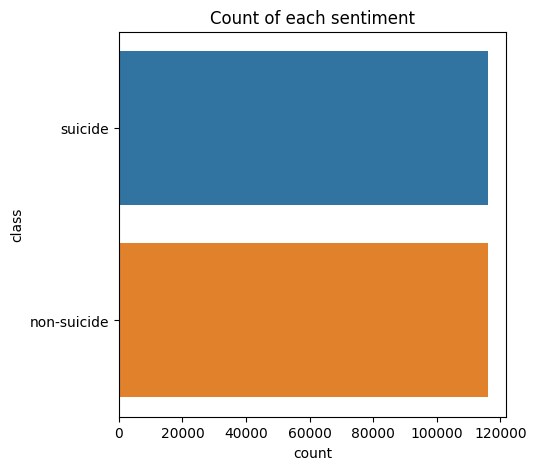

In [13]:
col = 'class'
fig, (ax1)  = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
explode = list((np.array(list(df[col].dropna().value_counts()))/sum(list(df[col].dropna().value_counts())))[::-1])[:12]
sns.countplot(y =col, data = df, ax=ax1)
ax1.set_title("Count of each sentiment")
plt.show()

We can see that it is a Balanced dataset

# Look at the length of the characters/words, and avg number of characters in our dataset

In [14]:
df['char_length'] = df['text'].apply(lambda x : len(x))
df['token_length'] = df['text'].apply(lambda x : len(x.split(" ")))

/common/home/projectgrps/IS424/IS424G10/jupyterlab-venv-tf/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
/common/home/projectgrps/IS424/IS424G10/jupyterlab-venv-tf/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This 

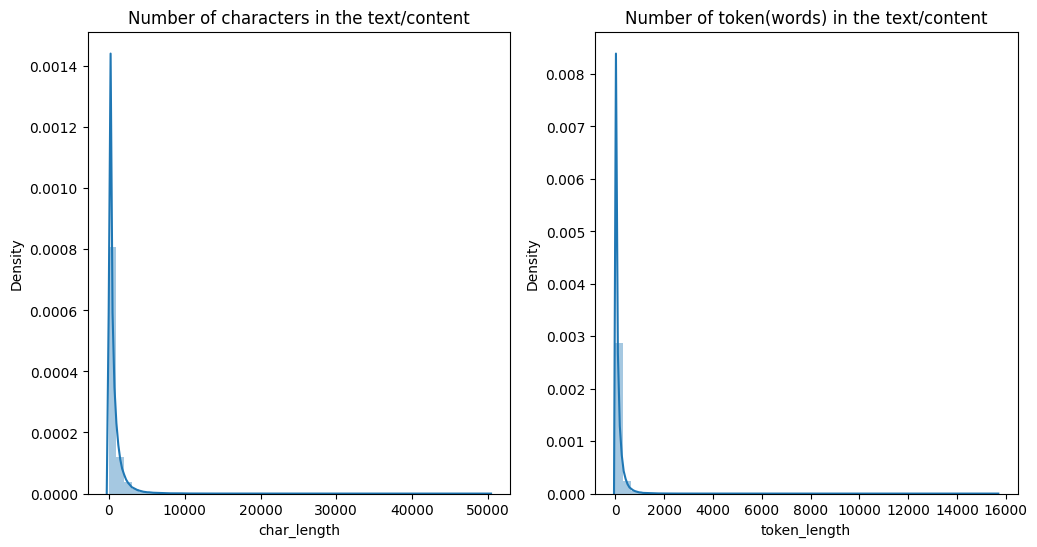

In [15]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.distplot(df['char_length'], ax=ax1)
sns.distplot(df['token_length'], ax=ax2)
ax1.set_title('Number of characters in the text/content')
ax2.set_title('Number of token(words) in the text/content')
plt.show()

In [16]:
avg_df = df.groupby('class').agg({'char_length':'mean', 'token_length':'mean'})

/common/home/projectgrps/IS424/IS424G10/jupyterlab-venv-tf/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/common/home/projectgrps/IS424/IS424G10/jupyterlab-venv-tf/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


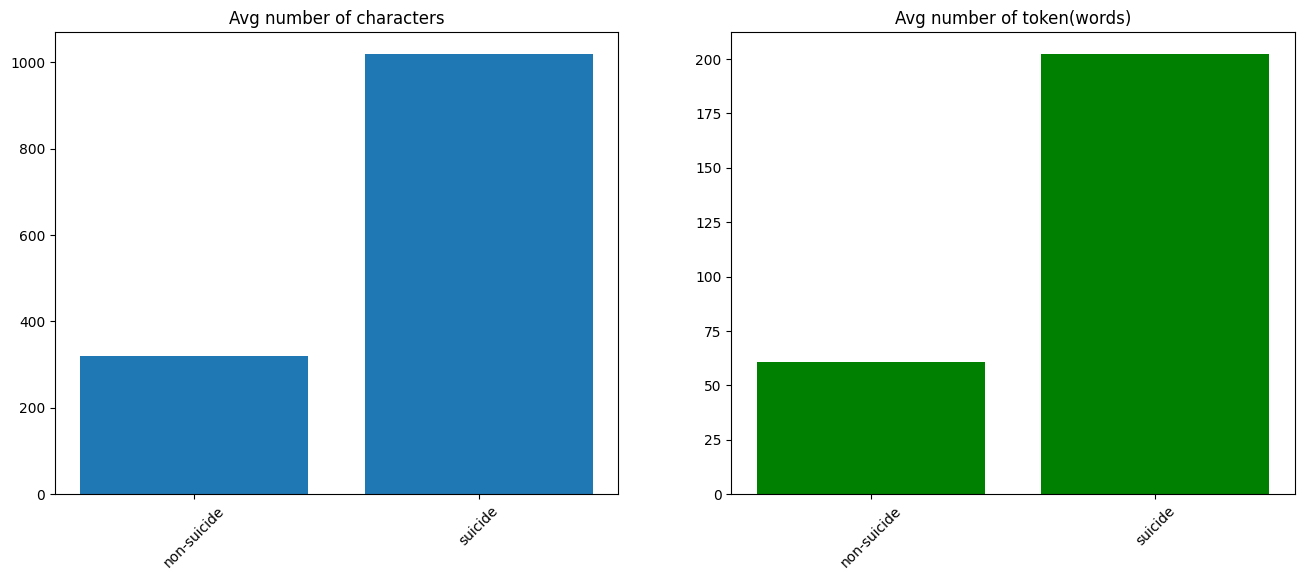

In [17]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
ax1.bar(avg_df.index, avg_df['char_length'])
ax2.bar(avg_df.index, avg_df['token_length'], color='green')
ax1.set_title('Avg number of characters')
ax2.set_title('Avg number of token(words)')
ax1.set_xticklabels(avg_df.index, rotation = 45)
ax2.set_xticklabels(avg_df.index, rotation = 45)
plt.show()

# Convert the numbers to text format

In [18]:
def num_to_str(words):
    try:
        string = words
        # extract the numbers from the string using a regular expression
        numbers = [Decimal(num) for num in re.findall(r'\b\d+\b', string)]

        # convert the numbers to text using the num2words library
        text = [num2words(num) for num in numbers]

        # replace the numbers in the original string with the text representations
        for num, txt in zip(numbers, text):
            string = re.sub(str(num), txt, string)
    except:
        print(df[df['text']==words].index)
    return string

In [19]:
df['text'] = df['text'].apply(num_to_str)

Int64Index([67507], dtype='int64')
Int64Index([97090], dtype='int64')
Int64Index([156944], dtype='int64')


In [20]:
df['text'][67507]

'rick roll in binary code \n010101110110010100100111011100100110010100100000011011100110111100100000011100110111010001110010011000010110111001100111011001010111001001110011001000000111010001101111001000000110110001101111011101100110010100001010010110010110111101110101001000000110101101101110011011110111011100100000011101000110100001100101001000000111001001110101011011000110010101110011001000000110000101101110011001000010000001110011011011110010000001100100011011110010000001001001000010100100000100100000011001100111010101101100011011000010000001100011011011110110110101101101011010010111010001101101011001010110111001110100001001110111001100100000011101110110100001100001011101000010000001001001001001110110110100100000011101000110100001101001011011100110101101101001011011100110011100100000011011110110011000001010010110010110111101110101001000000111011101101111011101010110110001100100011011100010011101110100001000000110011101100101011101000010000001110100011010000110100101110011001000000110

In [21]:
df['text'][97090]

'34895704483281583042437503838291044899025448849810161712936080214455502109208029816756870778097936399390940477962 5485700232036262327746841663183613796330578267486647623042309953491116556066830174746167569457109488540119463986843431337291775458716534425805410001410751351260329493003057986761122301906898997032745014348241818705491889172207793699634988682046657656333825385117333560036615841996405076723361102393115544175508921080297172490\n\na basic puzzle'

In [22]:
df['text'][156944]

'heres the 40k digets of pi hopefully i dont crash whatever device youre using and if i do sorry lol 31415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679821480865132823066470938446095505822317253594081284811174502841027019385211055596446229489549303819644288109756659334461284756482337867831652712019091456485669234603486104543266482133936072602491412737245870066063155881748815209209628292540917153643678925903600113305305488204665213841469519415116094330572703657595919530921861173819326117931051185480744623799627495673518857527248912279381830119491298336733624406566430860213949463952247371907021798609437027705392171762931767523846748184676694051320005681271452635608277857713427577896091736371787214684409012249534301465495853710507922796892589235420199561121290219608640344181598136297747713099605187072113499999983729780499510597317328160963185950244594553469083026425223082533446850352619311881710100031378387528865875332083814206171776691473

Since it is a spam, lets drop the 3 rows above.

In [23]:
df.drop(labels=67507, inplace=True)
df.drop(labels=97090, inplace=True)
df.drop(labels=156944, inplace=True)

In [24]:
df.head(3)

,text,class,char_length,token_length
0,ex wife threatening suiciderecently i left my ...,suicide,703,143
1,am i weird i dont get affected by compliments ...,non-suicide,136,27
2,finally two thousand and twenty is almost over...,non-suicide,122,26


In [25]:
df.iloc[2]

text            finally two thousand and twenty is almost over...
class                                                 non-suicide
char_length                                                   122
token_length                                                   26
Name: 2, dtype: object

We can see that we successfully converted the word '2020' to text format.

# Remove stop words first

In [26]:
#keep a backup incase we need later
df_spare = df.copy()

In [27]:
df['text'] =df['text'].apply(lambda t: gensim.parsing.preprocessing.remove_stopwords(str(t)))

In [28]:
df_spare['text'][1]

'am i weird i dont get affected by compliments if its coming from someone i know irl but i feel really good when internet strangers do it'

In [29]:
df['text'][1]

'weird dont affected compliments coming know irl feel good internet strangers'

We can see that the stop words are removed

/common/home/projectgrps/IS424/IS424G10/jupyterlab-venv-tf/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == "__main__":
/common/home/projectgrps/IS424/IS424G10/jupyterlab-venv-tf/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


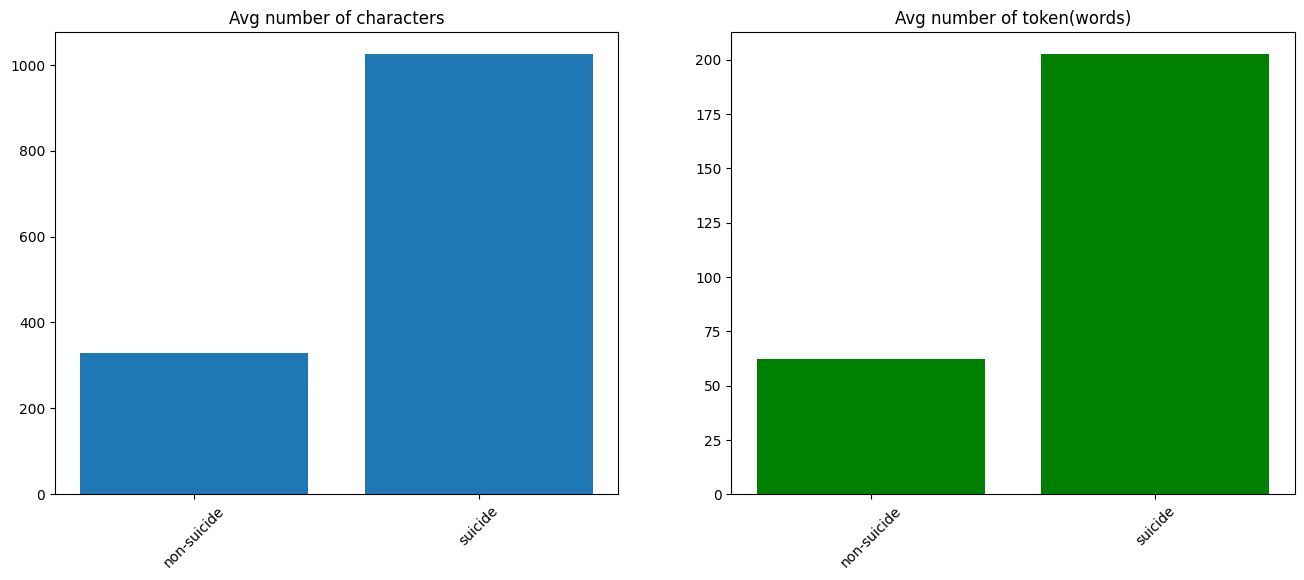

/common/home/projectgrps/IS424/IS424G10/jupyterlab-venv-tf/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
/common/home/projectgrps/IS424/IS424G10/jupyterlab-venv-tf/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator


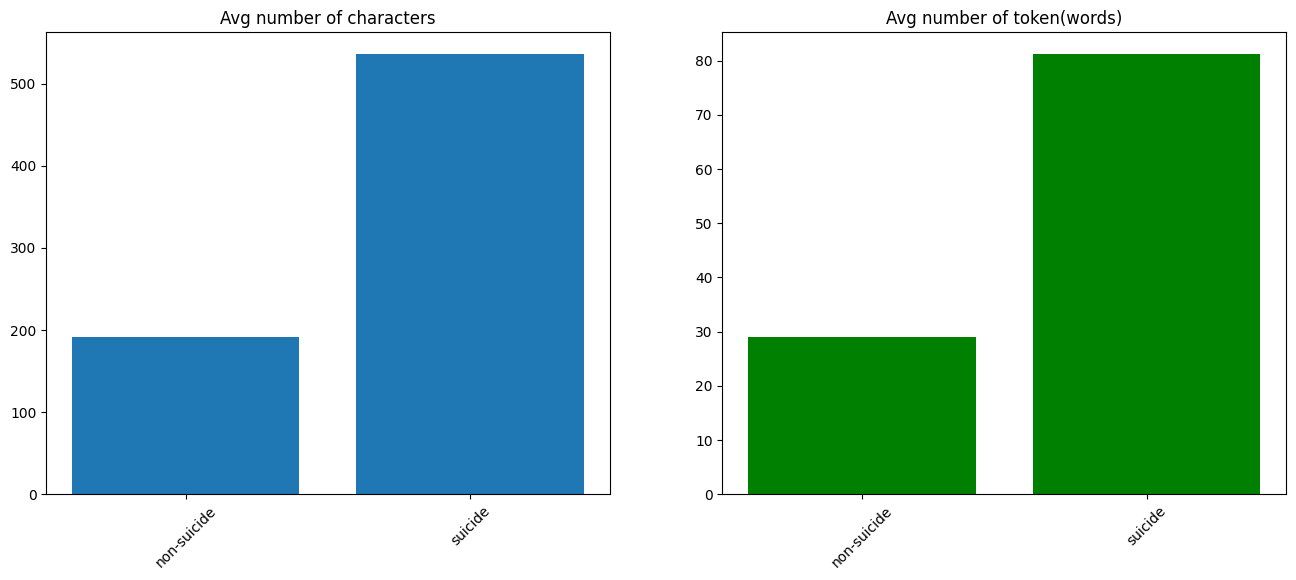

In [30]:
df_spare['char_length'] = df_spare['text'].apply(lambda x : len(x))
df_spare['token_length'] = df_spare['text'].apply(lambda x : len(x.split(" ")))
avg_df = df_spare.groupby('class').agg({'char_length':'mean', 'token_length':'mean'})
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
ax1.bar(avg_df.index, avg_df['char_length'])
ax2.bar(avg_df.index, avg_df['token_length'], color='green')
ax1.set_title('Avg number of characters')
ax2.set_title('Avg number of token(words)')
ax1.set_xticklabels(avg_df.index, rotation = 45)
ax2.set_xticklabels(avg_df.index, rotation = 45)
plt.show()


df['char_length'] = df['text'].apply(lambda x : len(x))
df['token_length'] = df['text'].apply(lambda x : len(x.split(" ")))
avg_df = df.groupby('class').agg({'char_length':'mean', 'token_length':'mean'})
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
ax1.bar(avg_df.index, avg_df['char_length'])
ax2.bar(avg_df.index, avg_df['token_length'], color='green')
ax1.set_title('Avg number of characters')
ax2.set_title('Avg number of token(words)')
ax1.set_xticklabels(avg_df.index, rotation = 45)
ax2.set_xticklabels(avg_df.index, rotation = 45)
plt.show()

We can see that the amount of words reduced after removing stopwords. That should help with our pre-processing (faster too)

# Lematize text

In [31]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /common/home/projectgrps/IS424/IS424G10/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text)])

In [33]:
df['text'] = df['text'].apply(lemmatize_text)

In [34]:
df_spare['text'][1]

'am i weird i dont get affected by compliments if its coming from someone i know irl but i feel really good when internet strangers do it'

In [35]:
df['text'][1]

'weird dont affected compliment coming know irl feel good internet stranger'

Ignoring the stop words, we can see that the word 'compliments' became 'compliment'; Successful Lematization

# Fix Typos

I skipped this as it took more than 2-3hours of running. Might consult prof on this as it takes super long even with my prof's GPU cluster account. <br>
<b> (4 Nvidia RTX 3090 GeForce GPU, 384GB Memory, AMD 7720P 62 Cores/128 Threads) </b>

In [36]:
# 7 works but inaccurate

In [37]:
symsp = SymSpell(max_dictionary_edit_distance=1, prefix_length=5)

In [38]:
dictionary_path = pkg_resources.resource_filename("symspellpy", "frequency_dictionary_en_82_765.txt")
symsp.load_dictionary(dictionary_path, term_index=0, count_index=1)
df['text'] = df['text'].apply(lambda t: symsp.lookup_compound(t, max_edit_distance=1)[0].term )

# Lematize and remove stop words again

In [39]:
df['text'] = df['text'].apply(lemmatize_text)
df['text'] =df['text'].apply(lambda t: gensim.parsing.preprocessing.remove_stopwords(str(t)))

In [40]:
df_spare['text'].iloc[50][0:15]

'seven yearsguys'

In [41]:
df['text'].iloc[50][0:15]

'seven year guy '

# Convert labels to 0 and1

In [42]:
df['class'] = df['class'].apply(lambda x: 1 if x == 'suicide' else 0)

In [59]:
df['class'].value_counts()

1    116037
0    116034
Name: class, dtype: int64

Drop rows with < 1 char

After clearing, some text have '' but is not labelled as na

In [74]:
df = df[df['text'].str.len() > 0]

# Split data to train, validation, test (70-10-20)

In [76]:
from sklearn.model_selection import train_test_split

0.8 * 0.125 = 0.10 (how we split from train to validation)

In [77]:
# Split the dataset into train, validation, and test sets
train_val, test = train_test_split(df, test_size=0.2, random_state=0)
train, val = train_test_split(train_val, test_size=0.125, random_state=0)
# Export each set to a CSV file
train.to_csv('train_set.csv', index=False)
val.to_csv('validation_set.csv', index=False)
test.to_csv('test_set.csv', index=False)

In [78]:
df.to_csv('preprocessed.csv', index=False)

The CSV will be used in other notebooks if necessasary